<a href="https://colab.research.google.com/github/JasonLimJS/EURUSD_Forecast/blob/master/1_Data_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction:**

This document details all the steps involved in importing all relevant data sets via[ Exchange rates API](https://exchangeratesapi.io/) and [Federal Reserve Bank of of St. Louis API](https://research.stlouisfed.org/docs/api/fred/).

**Target variable:**
Daily EUR/USD exchange rate 

**Predictors considered:**

1.   Daily 1- Month USD London Interbank Offered Rate (LIBOR)
2.   Daily 3- Month USD  London Interbank Offered Rate (LIBOR)
3.   Daily 1- Month EUR London Interbank Offered Rate  (LIBOR)
4.   Daily 3- Month EUR London Interbank Offered Rate  (LIBOR)
5.   Daily Last Price of Standard & Poor (S&P) 500 Index
6.   Daily Last Price of Chicago Board of Exchange (CBOE) Volatility Index (VIX)
7.   Daily Moody's Seasoned AAA Bond Spread
8.   Daily 2- Year Intercontinental Exchange (ICE) Swap Rate
9.   Daily 3- Year Intercontinental Exchange (ICE) Swap Rate
10. Daily 5- Year Intercontinental Exchange (ICE) Swap Rate
11. Daily 7- Year Intercontinental Exchange (ICE) Swap Rate

1. Historical Data of EUR/USD Exchange Rate (1  year of data up to today)

Info of eurusd_data : 
 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2018-07-06 to 2019-07-05
Data columns (total 1 columns):
EURUSD    255 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB
None


Head of eurusd_data : 
 
            EURUSD
Date              
2018-07-06  1.1724
2018-07-09  1.1789
2018-07-10  1.1713
2018-07-11  1.1735
2018-07-12  1.1658
2018-07-13  1.1643
2018-07-16  1.1720
2018-07-17  1.1707
2018-07-18  1.1611
2018-07-19  1.1588


Tail of eurusd_data : 
 
            EURUSD
Date              
2019-06-24  1.1394
2019-06-25  1.1388
2019-06-26  1.1362
2019-06-27  1.1370
2019-06-28  1.1380
2019-07-01  1.1349
2019-07-02  1.1301
2019-07-03  1.1293
2019-07-04  1.1288
2019-07-05  1.1260


Plot of eurusd_data: 


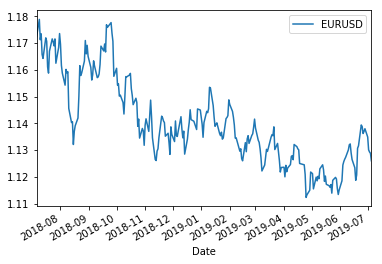

In [0]:
import requests
from bs4 import BeautifulSoup as BSoup
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import warnings
from google.colab import drive

warnings.simplefilter('ignore')


end_year= pd.to_datetime('today').year
end_mth= pd.to_datetime('today').month
end_day= pd.to_datetime('today').day

end_dt= pd.Timestamp(datetime(end_year,end_mth,end_day),'D')
start_dt= end_dt- 365

start_year= start_dt.year
start_mth= start_dt.month
start_day= start_dt.day

end_date= str(end_year) + '-' + str(end_mth) + '-' + str(end_day)
start_date= str(start_year) + '-' + str(start_mth) + '-' + str(start_day)

period= end_dt- start_dt
num_days= period.days

date_series= []
eurusd_series=[]

url= 'https://api.exchangeratesapi.io/history?start_at=' + start_date + '&end_at=' + end_date
web= requests.get(url)
soup = BSoup(web.text)
json_data= web.json()

for i in range(num_days):
  
  extract_date= start_dt + i
  str_year= str(extract_date.year)

  if extract_date.month < 10:
    str_month= '0' + str(extract_date.month)
  else:
    str_month= str(extract_date.month)

  if extract_date.day < 10:
    str_day= '0' + str(extract_date.day)
  else:
    str_day= str(extract_date.day)

  str_date= str_year + '-' + str_month + '-' + str_day  
  
  date_series.append(str_date)

  try:
    eurusd_series.append(json_data["rates"][str_date]['USD'])
  except:
    eurusd_series.append(np.NaN)
  
eurusd_data= pd.DataFrame({'Date':pd.to_datetime(date_series,format="%Y-%m-%d"),'EURUSD':eurusd_series})
eurusd_data.index= eurusd_data.Date
eurusd_data.drop(["Date"],axis=1,inplace=True)

eurusd_data.dropna(inplace=True)

print('Info of eurusd_data : \n ')
print(eurusd_data.info())
print('\n')
print('Head of eurusd_data : \n ')
print(eurusd_data.head(10))
print('\n')
print('Tail of eurusd_data : \n ')
print(eurusd_data.tail(10))
print('\n')
print('Plot of eurusd_data: ')
eurusd_data.plot()



2. Define functions to extract data from St.Louis FRED API

In [0]:
def extract_data_FRED(api_key,series,data):
  
  web_api= 'https://api.stlouisfed.org/fred/series/observations?series_id=' + series + '&api_key=' + api_key + '&file_type=json'
  
  web= requests.get(web_api)

  json_data= web.json()

  nrow= len(json_data['observations'])

  date_series= []
  extracted_series=[]

  for i in range(nrow):

    date_series.append(json_data['observations'][i]['date'])
    extracted_series.append(json_data['observations'][i]['value'])

  series_all = pd.DataFrame({'date':pd.to_datetime(date_series,format='%Y-%m-%d'),data:extracted_series})
  series_all.index= series_all.date
  series_all.drop(["date"],axis=1,inplace=True)

  series_data= series_all[np.logical_and(series_all.index >= start_dt,series_all.index <= end_dt)]

  series_data[data]= pd.to_numeric(series_data[data],errors='coerce')
  series_data.dropna(inplace=True)

  print('Info of ' + data  + ' : \n ')
  print(series_data.info())
  print('\n')
  print('Head of ' + data + ' : \n ')
  print(series_data.head(10))
  print('\n')
  print('Tail of ' + data + ' : \n ')
  print(series_data.tail(10))
  print('\n')
  print('Plot of ' + data + ': ')
  series_data.plot()
  
  return series_data



3. Historical Data of USD 3M LIBOR (1 year up to today)

Info of usd_libor_3m : 
 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2018-07-06 to 2019-06-28
Data columns (total 1 columns):
usd_libor_3m    248 non-null float64
dtypes: float64(1)
memory usage: 3.9 KB
None


Head of usd_libor_3m : 
 
            usd_libor_3m
date                    
2018-07-06       2.33144
2018-07-09       2.33313
2018-07-10       2.33744
2018-07-11       2.33700
2018-07-12       2.33919
2018-07-13       2.33600
2018-07-16       2.33263
2018-07-17       2.34194
2018-07-18       2.34750
2018-07-19       2.34706


Tail of usd_libor_3m : 
 
            usd_libor_3m
date                    
2019-06-17       2.41850
2019-06-18       2.38663
2019-06-19       2.38613
2019-06-20       2.34313
2019-06-21       2.34925
2019-06-24       2.33288
2019-06-25       2.31125
2019-06-26       2.32988
2019-06-27       2.31888
2019-06-28       2.31988


Plot of usd_libor_3m: 


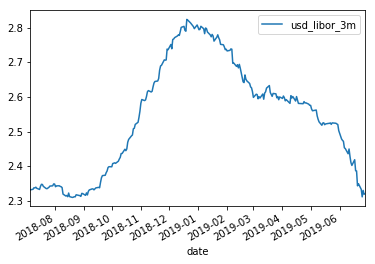

In [0]:
usd_libor_3m= extract_data_FRED('6115b5b678c19903ead2763597d45e1e','USD3MTD156N','usd_libor_3m')

4. Historical Data of EUR 3M LIBOR (1 year up to today)

Info of eur_libor_3m : 
 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2018-07-06 to 2019-06-28
Data columns (total 1 columns):
eur_libor_3m    248 non-null float64
dtypes: float64(1)
memory usage: 3.9 KB
None


Head of eur_libor_3m : 
 
            eur_libor_3m
date                    
2018-07-06      -0.35686
2018-07-09      -0.35700
2018-07-10      -0.35543
2018-07-11      -0.35643
2018-07-12      -0.35771
2018-07-13      -0.35786
2018-07-16      -0.35786
2018-07-17      -0.35800
2018-07-18      -0.35771
2018-07-19      -0.35771


Tail of eur_libor_3m : 
 
            eur_libor_3m
date                    
2019-06-17      -0.36014
2019-06-18      -0.37314
2019-06-19      -0.37543
2019-06-20      -0.37614
2019-06-21      -0.37771
2019-06-24      -0.37871
2019-06-25      -0.37971
2019-06-26      -0.38571
2019-06-27      -0.38186
2019-06-28      -0.39143


Plot of eur_libor_3m: 


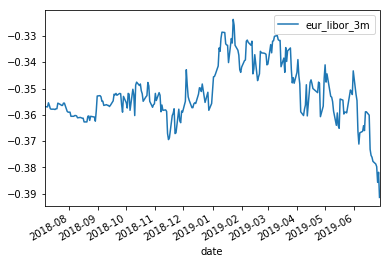

In [0]:
eur_libor_3m= extract_data_FRED('6115b5b678c19903ead2763597d45e1e','EUR3MTD156N','eur_libor_3m')

5. Historical Data of S&P 500 (1 year up to today)

Info of snp500 : 
 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-07-06 to 2019-07-05
Data columns (total 1 columns):
snp500    251 non-null float64
dtypes: float64(1)
memory usage: 3.9 KB
None


Head of snp500 : 
 
             snp500
date               
2018-07-06  2759.82
2018-07-09  2784.17
2018-07-10  2793.84
2018-07-11  2774.02
2018-07-12  2798.29
2018-07-13  2801.31
2018-07-16  2798.43
2018-07-17  2809.55
2018-07-18  2815.62
2018-07-19  2804.49


Tail of snp500 : 
 
             snp500
date               
2019-06-21  2950.46
2019-06-24  2945.35
2019-06-25  2917.38
2019-06-26  2913.78
2019-06-27  2924.92
2019-06-28  2941.76
2019-07-01  2964.33
2019-07-02  2973.01
2019-07-03  2995.82
2019-07-05  2990.41


Plot of snp500: 


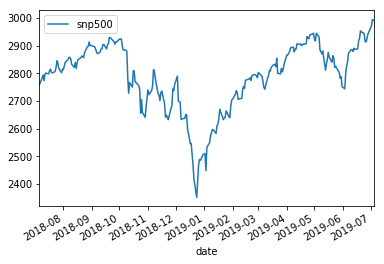

In [0]:
snp500= extract_data_FRED('6115b5b678c19903ead2763597d45e1e','SP500','snp500')

6.  Historical Data of USD 1- Month LIBOR (1 year up to today)

Info of usd_libor_1m : 
 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2018-07-06 to 2019-06-28
Data columns (total 1 columns):
usd_libor_1m    248 non-null float64
dtypes: float64(1)
memory usage: 3.9 KB
None


Head of usd_libor_1m : 
 
            usd_libor_1m
date                    
2018-07-06       2.08625
2018-07-09       2.07750
2018-07-10       2.06650
2018-07-11       2.07425
2018-07-12       2.07163
2018-07-13       2.07325
2018-07-16       2.07850
2018-07-17       2.08175
2018-07-18       2.08625
2018-07-19       2.08100


Tail of usd_libor_1m : 
 
            usd_libor_1m
date                    
2019-06-17       2.39025
2019-06-18       2.38288
2019-06-19       2.38338
2019-06-20       2.40363
2019-06-21       2.40438
2019-06-24       2.40175
2019-06-25       2.40413
2019-06-26       2.40238
2019-06-27       2.40238
2019-06-28       2.39800


Plot of usd_libor_1m: 


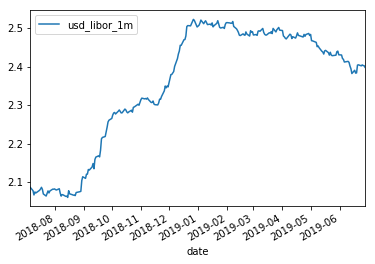

In [0]:
usd_libor_1m= extract_data_FRED('6115b5b678c19903ead2763597d45e1e','USD1MTD156N','usd_libor_1m')

7. Historical Data of EUR 1-Month LIBOR (1 year up to today)

Info of eur_libor_1m : 
 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2018-07-06 to 2019-06-28
Data columns (total 1 columns):
eur_libor_1m    248 non-null float64
dtypes: float64(1)
memory usage: 3.9 KB
None


Head of eur_libor_1m : 
 
            eur_libor_1m
date                    
2018-07-06       2.08625
2018-07-09       2.07750
2018-07-10       2.06650
2018-07-11       2.07425
2018-07-12       2.07163
2018-07-13       2.07325
2018-07-16       2.07850
2018-07-17       2.08175
2018-07-18       2.08625
2018-07-19       2.08100


Tail of eur_libor_1m : 
 
            eur_libor_1m
date                    
2019-06-17       2.39025
2019-06-18       2.38288
2019-06-19       2.38338
2019-06-20       2.40363
2019-06-21       2.40438
2019-06-24       2.40175
2019-06-25       2.40413
2019-06-26       2.40238
2019-06-27       2.40238
2019-06-28       2.39800


Plot of eur_libor_1m: 


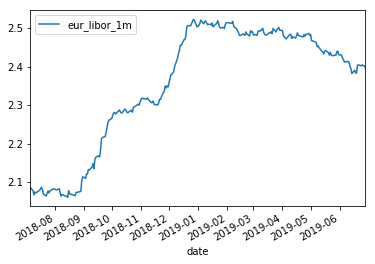

In [0]:
eur_libor_1m= extract_data_FRED('6115b5b678c19903ead2763597d45e1e','USD1MTD156N','eur_libor_1m')

8. Historical Data of CBOE Volatiltiy Index (VIX) (1 year up to today)

Info of vix : 
 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2018-07-06 to 2019-07-03
Data columns (total 1 columns):
vix    250 non-null float64
dtypes: float64(1)
memory usage: 3.9 KB
None


Head of vix : 
 
              vix
date             
2018-07-06  13.37
2018-07-09  12.69
2018-07-10  12.64
2018-07-11  13.63
2018-07-12  12.58
2018-07-13  12.18
2018-07-16  12.83
2018-07-17  12.06
2018-07-18  12.10
2018-07-19  12.87


Tail of vix : 
 
              vix
date             
2019-06-20  14.75
2019-06-21  15.40
2019-06-24  15.26
2019-06-25  16.28
2019-06-26  16.21
2019-06-27  15.82
2019-06-28  15.08
2019-07-01  14.06
2019-07-02  12.93
2019-07-03  12.57


Plot of vix: 


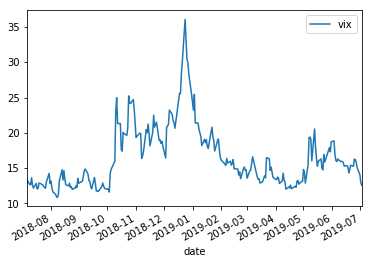

In [0]:
vix= extract_data_FRED('6115b5b678c19903ead2763597d45e1e','VIXCLS','vix')


9. Historical Data of Moody's Seasoned AAA Bond Spread (1 year up to today)

Info of bond_spread : 
 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2018-07-06 to 2019-07-03
Data columns (total 1 columns):
bond_spread    248 non-null float64
dtypes: float64(1)
memory usage: 3.9 KB
None


Head of bond_spread : 
 
            bond_spread
date                   
2018-07-06         1.06
2018-07-09         0.99
2018-07-10         0.98
2018-07-11         0.97
2018-07-12         0.96
2018-07-13         0.97
2018-07-16         0.97
2018-07-17         0.98
2018-07-18         0.97
2018-07-19         0.99


Tail of bond_spread : 
 
            bond_spread
date                   
2019-06-20         1.32
2019-06-21         1.29
2019-06-24         1.28
2019-06-25         1.32
2019-06-26         1.27
2019-06-27         1.26
2019-06-28         1.25
2019-07-01         1.24
2019-07-02         1.25
2019-07-03         1.22


Plot of bond_spread: 


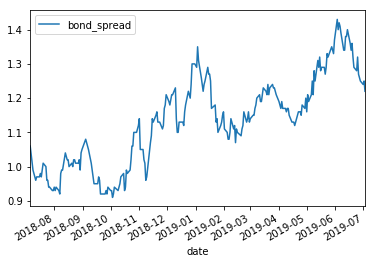

In [0]:
bond_spread= extract_data_FRED('6115b5b678c19903ead2763597d45e1e','AAA10Y','bond_spread')


10. Historical Data of 2Y ICE Swap Rate (1 year up to today)

Info of ice_swap_2y : 
 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 2018-07-06 to 2019-06-28
Data columns (total 1 columns):
ice_swap_2y    240 non-null float64
dtypes: float64(1)
memory usage: 3.8 KB
None


Head of ice_swap_2y : 
 
            ice_swap_2y
date                   
2018-07-06        0.253
2018-07-09        0.249
2018-07-10        0.249
2018-07-11        0.239
2018-07-12        0.234
2018-07-13        0.227
2018-07-16        0.224
2018-07-17        0.224
2018-07-18        0.224
2018-07-19        0.230


Tail of ice_swap_2y : 
 
            ice_swap_2y
date                   
2019-06-17        0.026
2019-06-18        0.029
2019-06-19        0.037
2019-06-20        0.021
2019-06-21        0.024
2019-06-24        0.011
2019-06-25        0.001
2019-06-26        0.029
2019-06-27        0.032
2019-06-28        0.053


Plot of ice_swap_2y: 


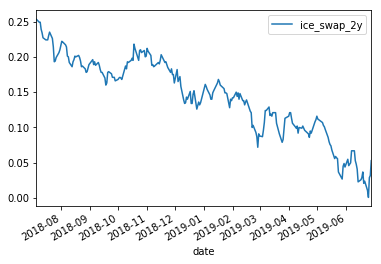

In [0]:
ice_swap_2y= extract_data_FRED('6115b5b678c19903ead2763597d45e1e','ICESPREADS1100USD2Y','ice_swap_2y')

11. Historical Data of 3Y ICE Swap Rate (1 year up to today)

Info of ice_swap_3y : 
 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 2018-07-06 to 2019-06-28
Data columns (total 1 columns):
ice_swap_3y    240 non-null float64
dtypes: float64(1)
memory usage: 3.8 KB
None


Head of ice_swap_3y : 
 
            ice_swap_3y
date                   
2018-07-06        0.223
2018-07-09        0.214
2018-07-10        0.213
2018-07-11        0.198
2018-07-12        0.199
2018-07-13        0.197
2018-07-16        0.199
2018-07-17        0.198
2018-07-18        0.198
2018-07-19        0.203


Tail of ice_swap_3y : 
 
            ice_swap_3y
date                   
2019-06-17        0.016
2019-06-18        0.022
2019-06-19        0.026
2019-06-20        0.011
2019-06-21        0.015
2019-06-24        0.003
2019-06-25       -0.001
2019-06-26       -0.003
2019-06-27        0.004
2019-06-28        0.030


Plot of ice_swap_3y: 


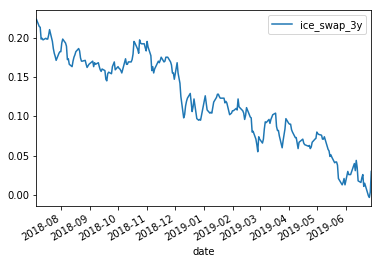

In [0]:
ice_swap_3y= extract_data_FRED('6115b5b678c19903ead2763597d45e1e','ICESPREADS1100USD3Y','ice_swap_3y')

12. Historical Data of 5Y ICE Swap Rate (1 year up to today)

Info of ice_swap_5y : 
 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244 entries, 2018-07-06 to 2019-06-28
Data columns (total 1 columns):
ice_swap_5y    244 non-null float64
dtypes: float64(1)
memory usage: 3.8 KB
None


Head of ice_swap_5y : 
 
            ice_swap_5y
date                   
2018-07-06        0.158
2018-07-09        0.148
2018-07-10        0.147
2018-07-11        0.141
2018-07-12        0.141
2018-07-13        0.140
2018-07-16        0.136
2018-07-17        0.138
2018-07-18        0.141
2018-07-19        0.144


Tail of ice_swap_5y : 
 
            ice_swap_5y
date                   
2019-06-17       -0.016
2019-06-18       -0.013
2019-06-19       -0.009
2019-06-20       -0.025
2019-06-21       -0.017
2019-06-24       -0.025
2019-06-25       -0.029
2019-06-26       -0.029
2019-06-27       -0.026
2019-06-28       -0.008


Plot of ice_swap_5y: 


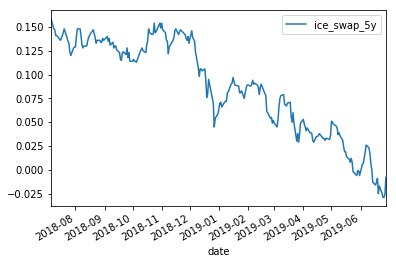

In [0]:
ice_swap_5y= extract_data_FRED('6115b5b678c19903ead2763597d45e1e','ICESPREADS1100USD5Y','ice_swap_5y')

13. Historical Data of 7Y ICE Swap Rate (1 year up to today)

Info of ice_swap_7y : 
 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244 entries, 2018-07-06 to 2019-06-28
Data columns (total 1 columns):
ice_swap_7y    244 non-null float64
dtypes: float64(1)
memory usage: 3.8 KB
None


Head of ice_swap_7y : 
 
            ice_swap_7y
date                   
2018-07-06        0.090
2018-07-09        0.081
2018-07-10        0.084
2018-07-11        0.080
2018-07-12        0.076
2018-07-13        0.075
2018-07-16        0.071
2018-07-17        0.073
2018-07-18        0.076
2018-07-19        0.080


Tail of ice_swap_7y : 
 
            ice_swap_7y
date                   
2019-06-17       -0.056
2019-06-18       -0.052
2019-06-19       -0.046
2019-06-20       -0.067
2019-06-21       -0.056
2019-06-24       -0.065
2019-06-25       -0.070
2019-06-26       -0.071
2019-06-27       -0.060
2019-06-28       -0.043


Plot of ice_swap_7y: 


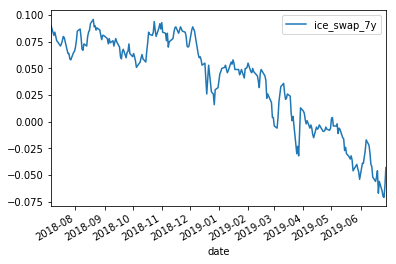

In [0]:
ice_swap_7y= extract_data_FRED('6115b5b678c19903ead2763597d45e1e','ICESPREADS1100USD7Y','ice_swap_7y')

15. Combine All Data Sets.

In [0]:
input_data=[
'eurusd_data',
'usd_libor_3m',
'eur_libor_3m',
'snp500',
'usd_libor_1m',
'eur_libor_1m',
'vix',
'bond_spread',
'ice_swap_2y',
'ice_swap_3y',
'ice_swap_5y',
'ice_swap_7y']

min_row= np.Inf

for i in input_data:
  min_row= min(len(locals()[i]),min_row)
  
  if len(locals()[i])==min_row:
    min_row_data= i
  
print(min_row)
print(min_row_data)

data_list=[]
start_list=[]
end_list=[]

for i in input_data:
  raw= locals()[i].copy()
  data= raw.reset_index(drop=True)
  start_ind= len(data)-min_row
  end_ind= len(data)
  data_trim= data.iloc[start_ind:end_ind,]
  data_trim.index= list(range(len(data_trim)))
  globals()[i + '_input']= data_trim
  data_list.append(i)
  start_list.append(raw.index[0])
  end_list.append(raw.index[len(raw)-1])
  
 
input_summary= pd.DataFrame({'input_data':data_list,'start_date':start_list,'end_date':end_list})

dat_1= locals()[input_data[0] + '_input']
dat_2= locals()[input_data[1] + '_input']

combin= dat_1.merge(dat_2,how='inner',left_index=True,right_index=True)

for i in range(2,len(input_data)):
  dat= locals()[input_data[i] + '_input']
  combin= combin.merge(dat,how='inner',left_index=True,right_index=True)
  
 
  

240
ice_swap_3y


16. Export combined input data into Google drive.

In [0]:
drive.mount('drive')

combin.to_csv('input_data.csv',index=False)
!cp input_data.csv drive/My\ Drive/Trading\ EURUSD\ with\ Deep\ Learning\ Algorithms/

print(input_summary)

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).
      input_data start_date   end_date
0    eurusd_data 2018-07-06 2019-07-05
1   usd_libor_3m 2018-07-06 2019-06-28
2   eur_libor_3m 2018-07-06 2019-06-28
3         snp500 2018-07-06 2019-07-05
4   usd_libor_1m 2018-07-06 2019-06-28
5   eur_libor_1m 2018-07-06 2019-06-28
6            vix 2018-07-06 2019-07-03
7    bond_spread 2018-07-06 2019-07-03
8    ice_swap_2y 2018-07-06 2019-06-28
9    ice_swap_3y 2018-07-06 2019-06-28
10   ice_swap_5y 2018-07-06 2019-06-28
11   ice_swap_7y 2018-07-06 2019-06-28
